In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
missing_train = df_train.isnull().sum().reset_index()
missing_train.columns = ["Column", "Missing_Count"]
missing_train = missing_train[missing_train["Missing_Count"] >= 1]
missing_train

,Column,Missing_Count
5,Age,177
10,Cabin,687
11,Embarked,2


In [5]:
missing_test = df_test.isnull().sum().reset_index()
missing_test.columns = ["Column", "Missing_Count"]
missing_test = missing_test[missing_test["Missing_Count"] >= 1]
missing_test

,Column,Missing_Count
4,Age,86
8,Fare,1
9,Cabin,327


In [6]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical data
num_data = df_train.select_dtypes(include = ["int", "float"])
cat_data = df_train.select_dtypes(include = ["object"])

# Create imputer for numerical data and categorical data
num_imputer = SimpleImputer(strategy = "mean")
cat_imputer = SimpleImputer(strategy = "most_frequent")

# Fit and transform numerical data and categorical data
num_imp = num_imputer.fit_transform(num_data)
cat_imp = cat_imputer.fit_transform(cat_data)


# Convert imputed numerical data and categorical data back to DataFrame
num_df = pd.DataFrame(num_imp, columns = num_data.columns)
cat_df = pd.DataFrame(cat_imp, columns = cat_data.columns)


# Concatenate imputed numerical and categorical DataFrames
train = pd.concat([num_df, cat_df], axis = 1)

train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,373450,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000,"Montvila, Rev. Juozas",male,211536,B96 B98,S
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,889.0,0.0,3.0,29.699118,1.0,2.0,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96 B98,S
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000,"Behr, Mr. Karl Howell",male,111369,C148,C


In [7]:
missing_train = train.isnull().sum().reset_index()
missing_train.columns = ["Column", "Missing_Count"]
missing_train = missing_train[missing_train["Missing_Count"] >= 1]
missing_train

,Column,Missing_Count


In [8]:
# Separate numerical and categorical data
num_data = df_test.select_dtypes(include = ["int", "float"])
cat_data = df_test.select_dtypes(include = ["object"])

# Create imputer for numerical data and categorical data
num_imputer = SimpleImputer(strategy = "mean")
cat_imputer = SimpleImputer(strategy = "most_frequent")

# Fit and transform numerical data and categorical data
num_imp = num_imputer.fit_transform(num_data)
cat_imp = cat_imputer.fit_transform(cat_data)


# Convert imputed numerical data and categorical data back to DataFrame
num_df = pd.DataFrame(num_imp, columns = num_data.columns)
cat_df = pd.DataFrame(cat_imp, columns = cat_data.columns)


# Concatenate imputed numerical and categorical DataFrames
test = pd.concat([num_df, cat_df], axis = 1)

test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,892.0,3.0,34.50000,0.0,0.0,7.8292,"Kelly, Mr. James",male,330911,B57 B59 B63 B66,Q
1,893.0,3.0,47.00000,1.0,0.0,7.0000,"Wilkes, Mrs. James (Ellen Needs)",female,363272,B57 B59 B63 B66,S
2,894.0,2.0,62.00000,0.0,0.0,9.6875,"Myles, Mr. Thomas Francis",male,240276,B57 B59 B63 B66,Q
3,895.0,3.0,27.00000,0.0,0.0,8.6625,"Wirz, Mr. Albert",male,315154,B57 B59 B63 B66,S
4,896.0,3.0,22.00000,1.0,1.0,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,3.0,30.27259,0.0,0.0,8.0500,"Spector, Mr. Woolf",male,A.5. 3236,B57 B59 B63 B66,S
414,1306.0,1.0,39.00000,0.0,0.0,108.9000,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,1307.0,3.0,38.50000,0.0,0.0,7.2500,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,B57 B59 B63 B66,S
416,1308.0,3.0,30.27259,0.0,0.0,8.0500,"Ware, Mr. Frederick",male,359309,B57 B59 B63 B66,S


In [9]:
missing_test = test.isnull().sum().reset_index()
missing_test.columns = ["Column", "Missing_Count"]
missing_test = missing_test[missing_test["Missing_Count"] >= 1]
missing_test

,Column,Missing_Count


In [10]:
train.duplicated().sum()

np.int64(0)

## EXPLORATORY DATA ANALYSIS

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Name         891 non-null    object 
 8   Sex          891 non-null    object 
 9   Ticket       891 non-null    object 
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(7), object(5)
memory usage: 83.7+ KB


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
import plotly.express as px
# Count survivors
survived_counts = df_train["Survived"].value_counts()

# Create bar chart
fig = px.bar(x = survived_counts.index, y =  survived_counts.values)
fig.show()

In [14]:
num_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
fig = px.histogram(train, x = "Pclass", y = "Survived", nbins = 3, marginal = "box")
fig.show()

In [16]:
fig = px.histogram(train, x = "Age", y = "Survived", nbins = 76, marginal = "box")
fig.show()

In [17]:
fig = px.histogram(train, x = "SibSp", y = "Survived", nbins = 8, marginal = "box")
fig.show()

In [18]:
def detect_outliers(df, column):
    """Detect outliers using Interquartile Range (IQR) method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

def winsorize(df, column):
    """Winsorize data by replacing outliers with whisker values."""
    _, lower_bound, upper_bound = detect_outliers(df, column)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

num_cols = train.select_dtypes(include=["int64", "float64"]).columns
outlier_train = []

for column in num_cols:
    outliers, _, _ = detect_outliers(train, column)
    if not outliers.empty:
        outlier_train.append(column)
        # fig = px.box(train, x = train[column], title = f"Boxplot for {column}")
        # fig.show()

print("Columns with outliers:", outlier_train)

for column in outlier_train:
    train = winsorize(train, column) 

Columns with outliers: ['Age', 'SibSp', 'Parch', 'Fare']


In [19]:
# for i in num_cols:
#     fig = px.box(train, x = i)
#     fig.show()

In [20]:
num_test = test.select_dtypes(include = ["int64", "float64"]).columns
outlier_test = []

for column in num_test:
  outliers, _, _ = detect_outliers(test, column)
  if not outliers.empty:
    outlier_test.append(column)
print(f"Columns with outliers: {outlier_test}")

for column in outlier_test:
  test = winsorize(test, column)

Columns with outliers: ['Age', 'SibSp', 'Parch', 'Fare']


## FEATURE ENGINEERING

## Feature Creation

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

In [23]:
train["IsAlone"] = train["FamilySize"].apply(lambda x: 1 if x == 0 else 0)
test["IsAlone"] = test["FamilySize"].apply(lambda x: 1 if x == 0 else 0)

In [24]:
# Extract Title from Name
def extract_title(name):
    title = name.split(',')[1].split('.')[0]
    return title
train["Title"] = train["Name"].apply(extract_title)
test["Title"] = test["Name"].apply(extract_title)

In [25]:
train["AgeGroup"] = pd.cut(train["Age"], bins=[0, 18, 30, 50, 100], labels = ["Child", "Young Adult", "Adult", "Senior"])
test["AgeGroup"] = pd.cut(test["Age"], bins=[0, 18, 30, 50, 100], labels = ["Child", "Young Adult", "Adult", "Senior"])

# Convert AgeGroup to numerical values
age_group_map = {"Child" : 0, "Young Adult" : 1, "Adult" : 2, "Senior" : 3}
train["AgeGroup"] = train["AgeGroup"].map(age_group_map)
test["AgeGroup"] = test["AgeGroup"].map(age_group_map)


In [26]:
train["FareGroup"] = pd.cut(train["Fare"], bins = [0, 10, 30, 100, 1000], labels = ["Low", "Medium", "High", "Very High"])
test["FareGroup"] = pd.cut(test["Fare"], bins = [0, 10, 30, 100, 1000], labels = ["Low", "Medium", "High", "Very High"])

# Convert FareGroup to numerical values
fare_group_map = {"Low" : 0, "Medium" : 1, "High" : 2, "Very High" : 3}
train["FareGroup"] = train["FareGroup"].map(fare_group_map)
test["FareGroup"] = test["FareGroup"].map(fare_group_map)


In [27]:
train.drop(["SibSp", "Parch", "Name", "Ticket", "PassengerId", "Cabin", "Age", "Fare"], axis = 1, inplace = True)
test.drop(["SibSp", "Parch", "Name", "Ticket", "Cabin", "Age", "Fare"], axis = 1, inplace = True)

In [28]:
train

,Survived,Pclass,Sex,Embarked,FamilySize,IsAlone,Title,AgeGroup,FareGroup
0,0.0,3.0,male,S,1.0,0,Mr,1,0
1,1.0,1.0,female,C,1.0,0,Mrs,2,2
2,1.0,3.0,female,S,0.0,1,Miss,1,0
3,1.0,1.0,female,S,1.0,0,Mrs,2,2
4,0.0,3.0,male,S,0.0,1,Mr,2,0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,S,0.0,1,Rev,1,1
887,1.0,1.0,female,S,0.0,1,Miss,1,1
888,0.0,3.0,female,S,1.0,0,Miss,1,1
889,1.0,1.0,male,C,0.0,1,Mr,1,1


## Feature Encoding

In [30]:
train.nunique()

Survived       2
Pclass         3
Sex            2
Embarked       3
FamilySize     4
IsAlone        2
Title         17
AgeGroup       4
FareGroup      3
dtype: int64

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define columns for encoding
cat_cols_onehot = ["Sex", "Embarked"]
cat_cols_label = ["Title"]

# Apply LabelEncoder separately
le = LabelEncoder()
for col in cat_cols_label:
    train[col] = le.fit_transform(train[col])

# Create ColumnTransformer for one-hot encoding
ohe_transformer = ColumnTransformer(
    [("onehot", OneHotEncoder(), cat_cols_onehot)],
    remainder = "passthrough"
)

# Fit and transform one-hot encoded columns
transformed_data = ohe_transformer.fit_transform(train)

# Get feature names from ColumnTransformer
feature_names = ohe_transformer.get_feature_names_out()

# Separate one-hot encoded feature names and original column names
onehot_features = [name.replace("onehot__", "") for name in feature_names if "onehot" in name]
original_features = [col for col in train.columns if col not in cat_cols_onehot]

# Combine one-hot encoded feature names and original column names
column_names = onehot_features + original_features

# Convert transformed data to DataFrame with feature names
train = pd.DataFrame(transformed_data, columns = column_names)

train

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,FamilySize,IsAlone,Title,AgeGroup,FareGroup
0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,11.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,12.0,2.0,2.0
2,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,1.0,8.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,12.0,2.0,2.0
4,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,11.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,14.0,1.0,1.0
887,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,8.0,1.0,1.0
888,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,8.0,1.0,1.0
889,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,11.0,1.0,1.0


In [32]:
# Apply LabelEncoder separately
for col in cat_cols_label:
    test[col] = le.fit_transform(test[col])

# Create ColumnTransformer for one-hot encoding
ohe_transformer = ColumnTransformer(
    [("onehot", OneHotEncoder(), cat_cols_onehot)],
    remainder = "passthrough"
)

# Fit and transform one-hot encoded columns
transformed_data = ohe_transformer.fit_transform(test)

# Get feature names from ColumnTransformer
feature_names = ohe_transformer.get_feature_names_out()

# Separate one-hot encoded feature names and original column names
onehot_features = [name.replace("onehot__", "") for name in feature_names if "onehot" in name]
original_features = [col for col in test.columns if col not in cat_cols_onehot]

# Combine one-hot encoded feature names and original column names
column_names = onehot_features + original_features

# Convert transformed data to DataFrame with feature names
test = pd.DataFrame(transformed_data, columns = column_names)

test

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Pclass,FamilySize,IsAlone,Title,AgeGroup,FareGroup
0,0.0,1.0,0.0,1.0,0.0,892.0,3.0,0.0,1.0,5.0,2.0,0.0
1,1.0,0.0,0.0,0.0,1.0,893.0,3.0,1.0,0.0,6.0,2.0,0.0
2,0.0,1.0,0.0,1.0,0.0,894.0,2.0,0.0,1.0,5.0,3.0,0.0
3,0.0,1.0,0.0,0.0,1.0,895.0,3.0,0.0,1.0,5.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,896.0,3.0,1.0,0.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,1305.0,3.0,0.0,1.0,5.0,2.0,0.0
414,1.0,0.0,1.0,0.0,0.0,1306.0,1.0,0.0,1.0,1.0,2.0,2.0
415,0.0,1.0,0.0,0.0,1.0,1307.0,3.0,0.0,1.0,5.0,2.0,0.0
416,0.0,1.0,0.0,0.0,1.0,1308.0,3.0,0.0,1.0,5.0,2.0,0.0


In [33]:
from sklearn.utils import resample
df_0 = train[train["Survived"] == 0]
df_1 = train[train["Survived"] == 1]

df0_sam = resample(df_0, n_samples = 549)
df1_sam = resample(df_1, n_samples = 549)

df = pd.concat([df0_sam, df1_sam])
train = df.sample(frac = 1, ignore_index = True)

In [34]:
train

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,FamilySize,IsAlone,Title,AgeGroup,FareGroup
0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0,8.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,11.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,8.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,11.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,11.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,11.0,3.0,0.0
1094,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,11.0,2.0,2.0
1095,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,11.0,1.0,1.0
1096,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,11.0,1.0,0.0


In [35]:
## Seperating Independent Variables from Dependent Variables
features = train.drop('Survived', axis = 1) ## Independent variables
target = train['Survived'] ## Dependent variable

In [36]:
def drop_correlated_features(features, target, threshold = 0.6):

    while True:
        # Calculate correlation matrix
        corr_matrix = features.corr()

        # Identify highly correlated feature pairs
        correlated_features = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    correlated_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

        # If no correlated features, break the loop
        if not correlated_features:
            break

        # Drop the feature less correlated to the target variable
        for feature1, feature2 in correlated_features:
            if feature1 in features.columns and feature2 in features.columns:
                corr1 = abs(features[feature1].corr(target))
                corr2 = abs(features[feature2].corr(target))
                if corr1 < corr2:
                    features = features.drop(columns=[feature1])
                else:
                    features = features.drop(columns=[feature2])

    return features

In [37]:
features = drop_correlated_features(features, target)
features

,Sex_female,Embarked_C,Embarked_Q,Pclass,IsAlone,Title,AgeGroup
0,1.0,0.0,1.0,3.0,0.0,8.0,1.0
1,0.0,0.0,0.0,2.0,1.0,11.0,1.0
2,1.0,1.0,0.0,3.0,1.0,8.0,0.0
3,0.0,0.0,1.0,3.0,1.0,11.0,1.0
4,0.0,1.0,0.0,1.0,1.0,11.0,2.0
...,...,...,...,...,...,...,...
1093,0.0,0.0,0.0,3.0,1.0,11.0,3.0
1094,0.0,0.0,0.0,2.0,0.0,11.0,2.0
1095,0.0,0.0,0.0,2.0,1.0,11.0,1.0
1096,0.0,0.0,0.0,3.0,1.0,11.0,1.0


## Feature Scaling

In [38]:
features.describe()

,Sex_female,Embarked_C,Embarked_Q,Pclass,IsAlone,Title,AgeGroup
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,0.399818,0.215847,0.081056,2.235883,0.687614,10.080146,1.219490
std,0.490084,0.411596,0.273046,0.858178,0.463678,1.949908,0.810203
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,1.000000
50%,0.000000,0.000000,0.000000,3.000000,1.000000,11.000000,1.000000
75%,1.000000,0.000000,0.000000,3.000000,1.000000,11.000000,2.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,15.000000,3.000000


In [39]:
## Select columns to scale
cols = ["Title"]

In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize MinMaxScaler
scaler = StandardScaler()

# Fit and transform the scaler to the numeric columns
features[cols] = scaler.fit_transform(features[cols])

features.head()

,Sex_female,Embarked_C,Embarked_Q,Pclass,IsAlone,Title,AgeGroup
0,1.0,0.0,1.0,3.0,0.0,-1.067278,1.0
1,0.0,0.0,0.0,2.0,1.0,0.471957,1.0
2,1.0,1.0,0.0,3.0,1.0,-1.067278,0.0
3,0.0,0.0,1.0,3.0,1.0,0.471957,1.0
4,0.0,1.0,0.0,1.0,1.0,0.471957,2.0


In [41]:
features.describe()

,Sex_female,Embarked_C,Embarked_Q,Pclass,IsAlone,Title,AgeGroup
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1.098000e+03,1098.000000
mean,0.399818,0.215847,0.081056,2.235883,0.687614,-1.747236e-16,1.219490
std,0.490084,0.411596,0.273046,0.858178,0.463678,1.000456e+00,0.810203
min,0.000000,0.000000,0.000000,1.000000,0.000000,-5.171906e+00,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,-1.067278e+00,1.000000
50%,0.000000,0.000000,0.000000,3.000000,1.000000,4.719575e-01,1.000000
75%,1.000000,0.000000,0.000000,3.000000,1.000000,4.719575e-01,2.000000
max,1.000000,1.000000,1.000000,3.000000,1.000000,2.524272e+00,3.000000


In [42]:
from sklearn.model_selection import train_test_split

# Split training and temporary sets
X_train, X_val_test, y_train, y_val_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

# Split validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, random_state = 42)

## Feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store results
f1_score_list = []
accuracy_list = []
k_values = range(1, 8)

# Initialize XGBClassifier
xgb = XGBClassifier(random_state = 0)

for k in k_values:
    # Select k best features using mutual info
    selector = SelectKBest(mutual_info_classif, k = k)
    selector.fit(X_train, y_train)
    
    # Transform training, validation and testing data
    sel_X_train = selector.transform(X_train)
    sel_X_val = selector.transform(X_val)
    sel_X_test = selector.transform(X_test)
    
    # Train and evaluate XGBClassifier on validation set
    xgb.fit(sel_X_train, y_train)
    kbest_preds_val = xgb.predict(sel_X_val)
    kbest_preds_test = xgb.predict(sel_X_test)
    
    # Calculate f1 score and accuracy on validation and test sets
    f1_kbest_val = round(f1_score(y_val, kbest_preds_val, average='weighted'), 2)
    f1_kbest_test = round(f1_score(y_test, kbest_preds_test, average='weighted'), 2)
    accuracy_kbest_val = round(accuracy_score(y_val, kbest_preds_val), 2)
    accuracy_kbest_test = round(accuracy_score(y_test, kbest_preds_test), 2)
    
    # Append results to lists
    f1_score_list.append(f1_kbest_val)
    accuracy_list.append(accuracy_kbest_val)

# Find optimal k value
optimal_k = k_values[np.argmax(f1_score_list)]
print(f'Optimal k value: {optimal_k}')
print(f'Best Validation F1 Score: {max(f1_score_list)}')
print(f'Test F1 Score at optimal k: {f1_kbest_test}')
print(f'Test Accuracy at optimal k: {accuracy_kbest_test}')

Optimal k value: 5
Best Validation F1 Score: 0.82
Test F1 Score at optimal k: 0.8
Test Accuracy at optimal k: 0.8


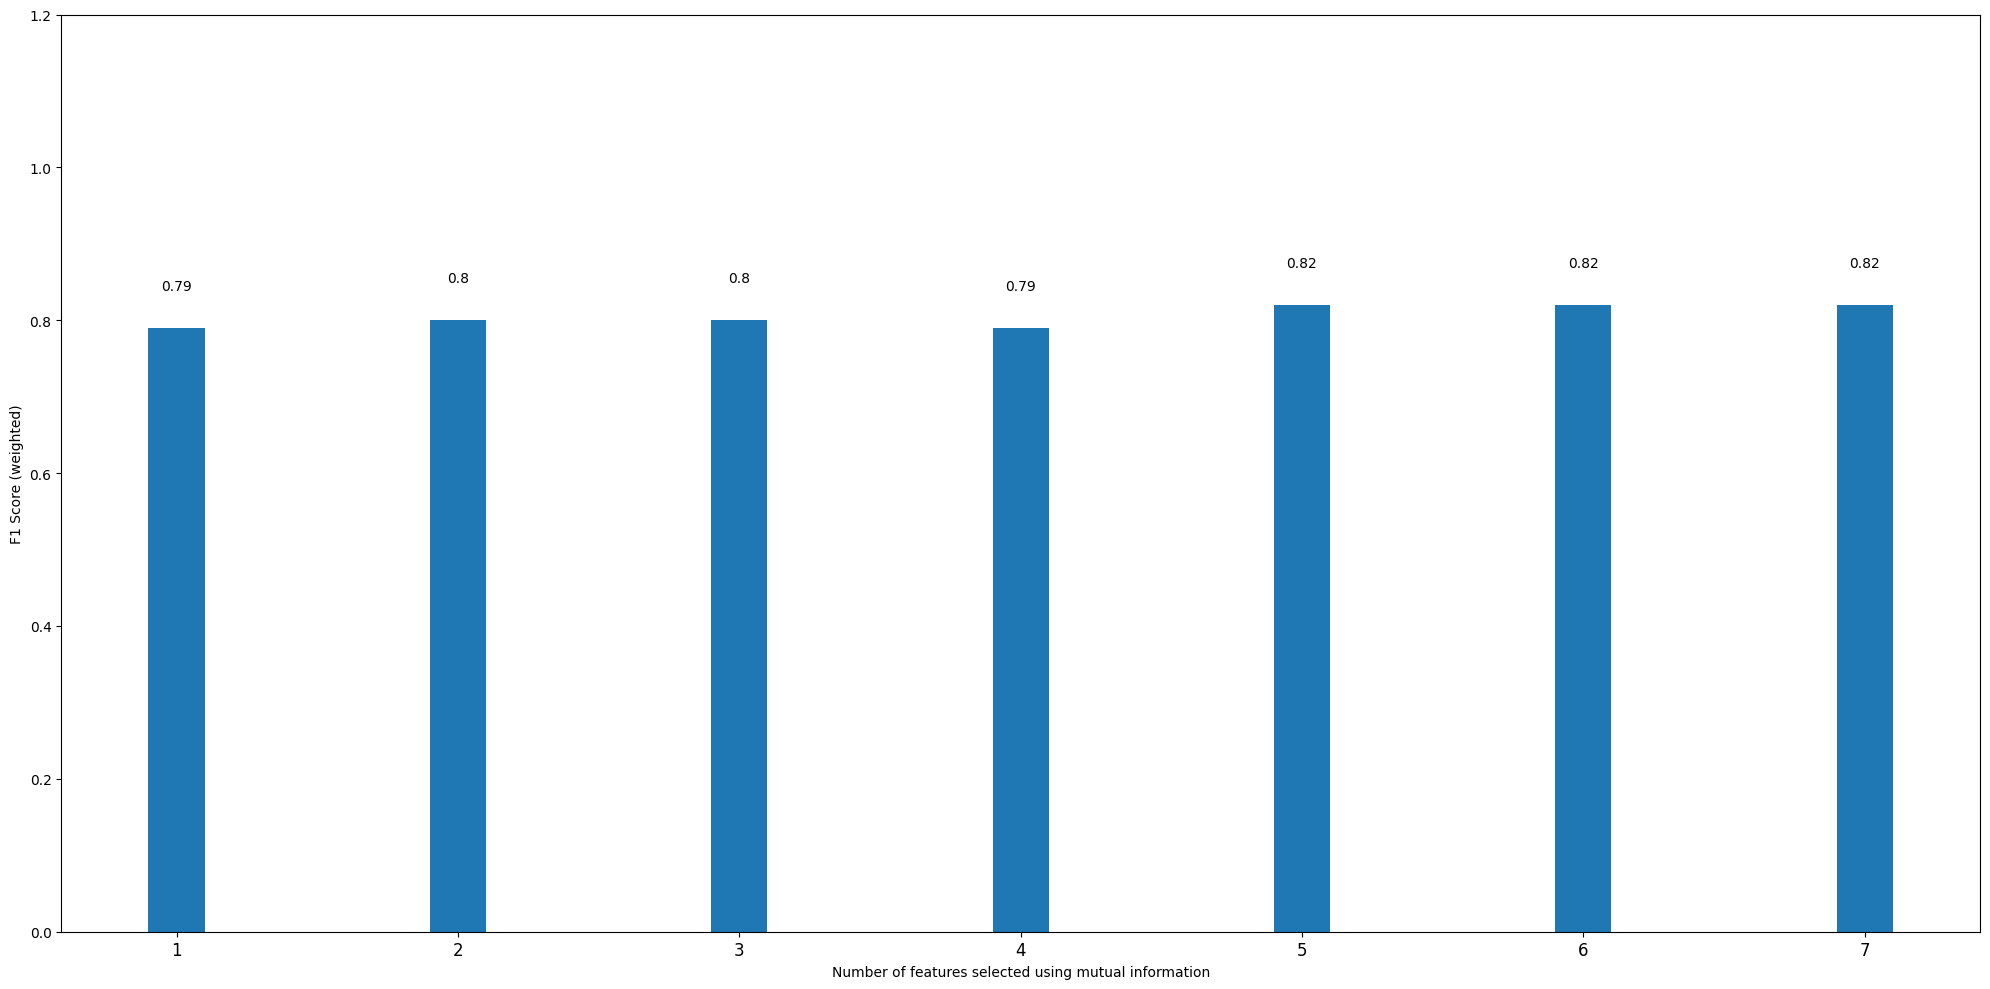

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

x = np.arange(1, 8)
y = f1_score_list

ax.bar(x, y, width = 0.2)
ax.set_xlabel("Number of features selected using mutual information")
ax.set_ylabel("F1 Score (weighted)")
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 8))
ax.set_xticklabels(np.arange(1, 8), fontsize = 12)

for i, v in enumerate(y):
  plt.text(x = i + 1, y = v + 0.05, s = str(v), ha = "center")
  
plt.tight_layout()

In [46]:
selector = SelectKBest(mutual_info_classif, k = 5)
selector.fit(X_train, y_train)

selected_features_mask = selector.get_support()

selected_features = X_train.columns[selected_features_mask]

In [47]:
X1 = features[selected_features]
y1 = target

In [48]:
# Initial split into training and temporary sets
X_train1, X_val_test1, y_train1, y_val_test1 = train_test_split(X1, y1, test_size = 0.4, random_state = 0)

# Split temporary set into validation and testing sets
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_val_test1, y_val_test1, test_size = 0.5, random_state = 0)

In [49]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_xgb = {
    "max_depth" : [3, 5, 7, 9, 12],
    "learning_rate" : [0.001, 0.01, 0.05, 0.1, 0.5],
    "n_estimators" : [50, 100, 150, 200, 250],
    "reg_alpha" : [0, 0.1, 0.5, 1, 2],
    "reg_lambda" : [0, 0.1, 0.5, 1, 2],
    "gamma" : [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 0.8, 1],
    'colsample_bytree': [0.5, 0.7, 0.8, 1],
    'colsample_bylevel': [0.5, 0.7, 0.8, 1],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [1, 5, 10],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss']
}

xgb_cv = RandomizedSearchCV(xgb, param_grid_xgb,  cv = 3, scoring = "neg_log_loss", n_jobs = -1)


In [50]:
xgb_cv.fit(X_train1, y_train1)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'colsample_bytree': [0.5, 0.7, 0.8, 1],
                                        'eval_metric': ['logloss'],
                                        'gamma': [0, 0.1, 0.5, 1],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1, 0.5],
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'objective': ['binary:logistic'],
                                        'reg_alpha': [0, 0.1, 0.5, 1, 2],
                                        'reg_lambda': [0, 0.1, 0.5, 1, 2],
                                        'scale_pos_weight': [1, 5, 10],
                                        'subsample': [0.5, 0.7, 0.8, 1]},
                   scoring='neg_log_loss')

In [51]:
# Predict on validation set
y_pred_val_xgb = xgb_cv.best_estimator_.predict(X_val1)

Validation Set Performance:
Accuracy: 0.79
F1-score: 0.79
Precision: 0.83
Recall: 0.75


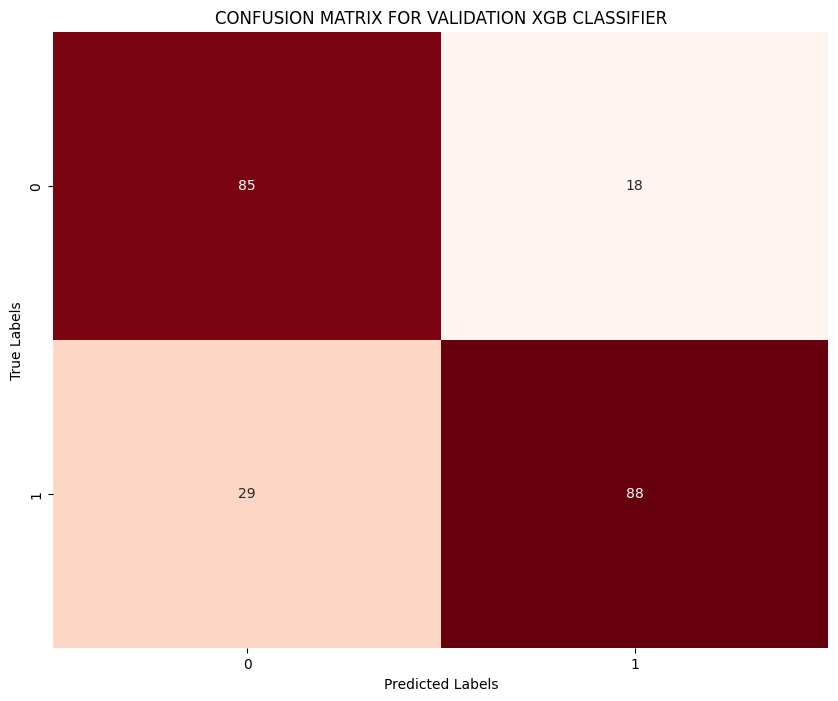

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns

# Evaluate model performance on validation set
accuracy_val = accuracy_score(y_val1, y_pred_val_xgb)
f1_val = f1_score(y_val1, y_pred_val_xgb)
precision_val = precision_score(y_val1, y_pred_val_xgb)
recall_val = recall_score(y_val1, y_pred_val_xgb)

print("Validation Set Performance:")
print(f"Accuracy: {accuracy_val:.2f}")
print(f"F1-score: {f1_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall: {recall_val:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(y_val1, y_pred_val_xgb)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Reds", cbar = False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CONFUSION MATRIX FOR VALIDATION XGB CLASSIFIER")
plt.show()

In [182]:
# Predict on test set
y_pred_test_xgb = xgb_cv.best_estimator_.predict(X_test1)

Test Set Performance:
Accuracy: 0.78
F1-score: 0.79
Precision: 0.75
Recall: 0.85


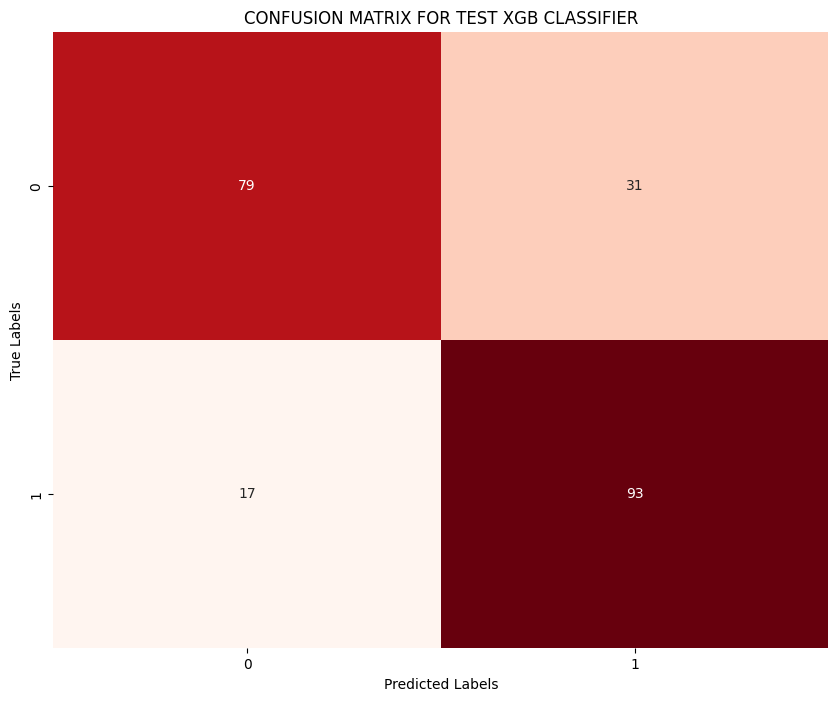

In [183]:
# Evaluate model performance on test set
accuracy_val = accuracy_score(y_test1, y_pred_test_xgb)
f1_val = f1_score(y_test1, y_pred_test_xgb)
precision_val = precision_score(y_test1, y_pred_test_xgb)
recall_val = recall_score(y_test1, y_pred_test_xgb)

print("Test Set Performance:")
print(f"Accuracy: {accuracy_val:.2f}")
print(f"F1-score: {f1_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall: {recall_val:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test1, y_pred_test_xgb)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Reds", cbar = False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CONFUSION MATRIX FOR TEST XGB CLASSIFIER")
plt.show()

In [184]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [185]:
rfc = RandomForestClassifier(random_state=13)

param_grid_rfc = {
    'max_depth': [3, 5, 10, 15, 20],
    'n_estimators': [50, 100, 250, 500, 1000],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'max_samples': [0.5, 0.7, 0.8, 1],
    'min_weight_fraction_leaf': [0, 0.1, 0.3],
    'min_impurity_decrease': [0, 0.1, 0.3],
    'warm_start': [True, False],
    'class_weight': ['balanced', None]
}

rfc_cv = RandomizedSearchCV(rfc, param_grid_rfc, cv = 5, scoring = "neg_log_loss", n_jobs = -1, n_iter = 10)

In [186]:
rfc_cv.fit(X_train1, y_train1)

c:\Users\GADGETS HUB ABUJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning:

invalid value encountered in cast



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=13),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.5, 0.7, 0.8, 1],
                                        'min_impurity_decrease': [0, 0.1, 0.3],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'min_weight_fraction_leaf': [0, 0.1,
                                                                     0.3],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000],
                                        'warm_start': [True, False]},
                   scoring='neg_log_loss')

In [187]:
# Predict on validation set
y_pred_val_rfc = rfc_cv.best_estimator_.predict(X_val1)

Validation Set Performance:
Accuracy: 0.74
F1-score: 0.72
Precision: 0.72
Recall: 0.72


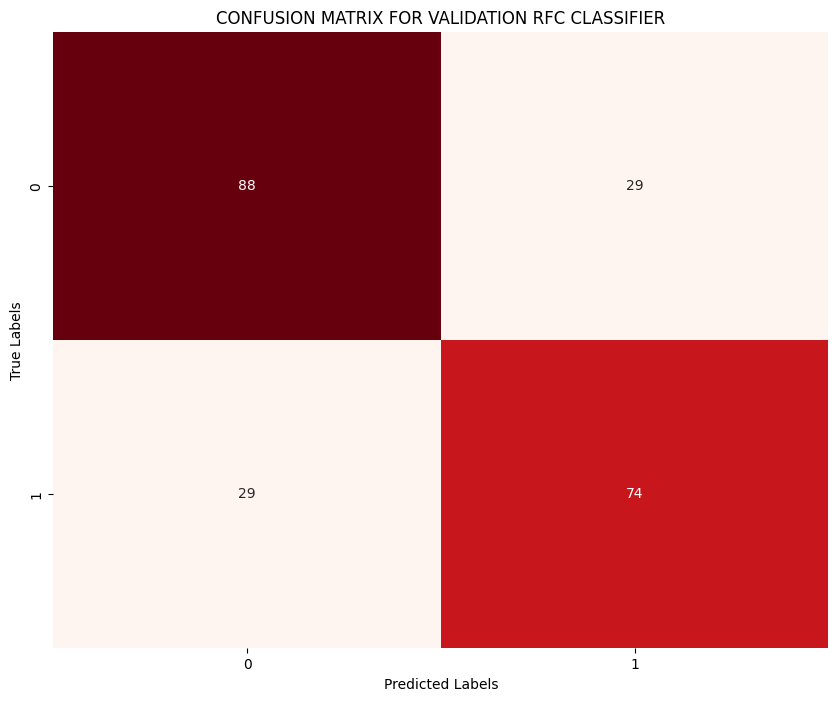

In [188]:
# Evaluate model performance on validation set
accuracy_val = accuracy_score(y_val1, y_pred_val_rfc)
f1_val = f1_score(y_val1, y_pred_val_rfc)
precision_val = precision_score(y_val1, y_pred_val_rfc)
recall_val = recall_score(y_val1, y_pred_val_rfc)

print("Validation Set Performance:")
print(f"Accuracy: {accuracy_val:.2f}")
print(f"F1-score: {f1_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall: {recall_val:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(y_val1, y_pred_val_rfc)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Reds", cbar = False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CONFUSION MATRIX FOR VALIDATION RFC CLASSIFIER")
plt.show()

In [189]:
# Predict on test set
y_pred_test_rfc = rfc_cv.best_estimator_.predict(X_test1)

Test Set Performance:
Accuracy: 0.81
F1-score: 0.81
Precision: 0.82
Recall: 0.81


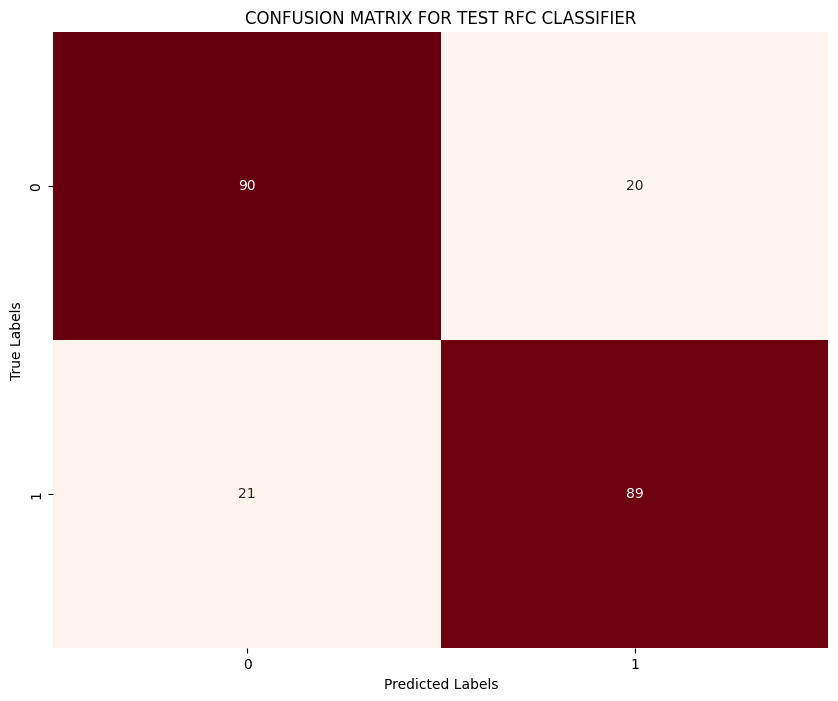

In [190]:
# Evaluate model performance on test set
accuracy_val = accuracy_score(y_test1, y_pred_test_rfc)
f1_val = f1_score(y_test1, y_pred_test_rfc)
precision_val = precision_score(y_test1, y_pred_test_rfc)
recall_val = recall_score(y_test1, y_pred_test_rfc)

print("Test Set Performance:")
print(f"Accuracy: {accuracy_val:.2f}")
print(f"F1-score: {f1_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall: {recall_val:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test1, y_pred_test_rfc)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Reds", cbar = False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CONFUSION MATRIX FOR TEST RFC CLASSIFIER")
plt.show()

In [191]:
gbc = GradientBoostingClassifier()
param_grid_gbc = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'min_weight_fraction_leaf': [0, 0.1, 0.5],
    'min_impurity_decrease': [0, 0.1, 0.5],
    'ccp_alpha': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1],
    'warm_start': [True, False],
    'random_state': [None, 42]
}

gbc_cv = RandomizedSearchCV(gbc, param_grid_gbc, cv = 5, scoring = "neg_log_loss", n_jobs = -1, n_iter = 10)

In [192]:
gbc_cv.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'loss': ['log_loss', 'exponential'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_impurity_decrease': [0, 0.1, 0.5],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0, 0.1,
                                                                     0.5],
                                        'n_estimators': [50, 100, 200, 500],
                                        'random_state': [None, 42],
                                        'subsample': [0.5, 0.8, 1],
                                        'warm_start': [True, False]},
                   scoring='neg_log_loss')

In [195]:
# Predict on validation set
y_pred_val_gbc = gbc_cv.best_estimator_.predict(X_val1)

Validation Set Performance:
Accuracy: 0.74
F1-score: 0.74
Precision: 0.69
Recall: 0.80


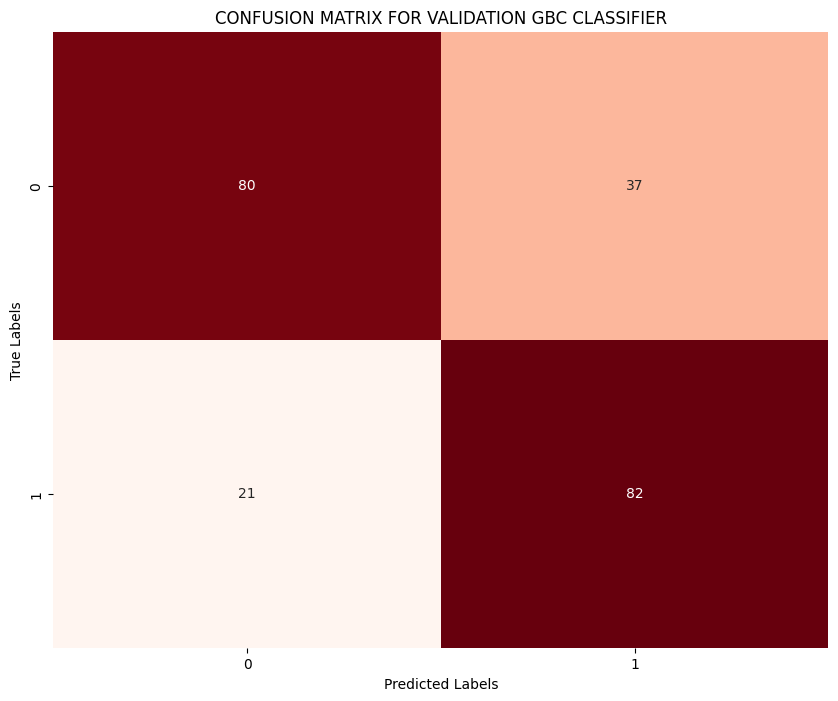

In [196]:
# Evaluate model performance on validation set
accuracy_val = accuracy_score(y_val1, y_pred_val_gbc)
f1_val = f1_score(y_val1, y_pred_val_gbc)
precision_val = precision_score(y_val1, y_pred_val_gbc)
recall_val = recall_score(y_val1, y_pred_val_gbc)

print("Validation Set Performance:")
print(f"Accuracy: {accuracy_val:.2f}")
print(f"F1-score: {f1_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall: {recall_val:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(y_val1, y_pred_val_gbc)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Reds", cbar = False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CONFUSION MATRIX FOR VALIDATION GBC CLASSIFIER")
plt.show()

In [197]:
# Predict on test set
y_pred_test_gbc = gbc_cv.best_estimator_.predict(X_test1)

Test Set Performance:
Accuracy: 0.79
F1-score: 0.80
Precision: 0.76
Recall: 0.85


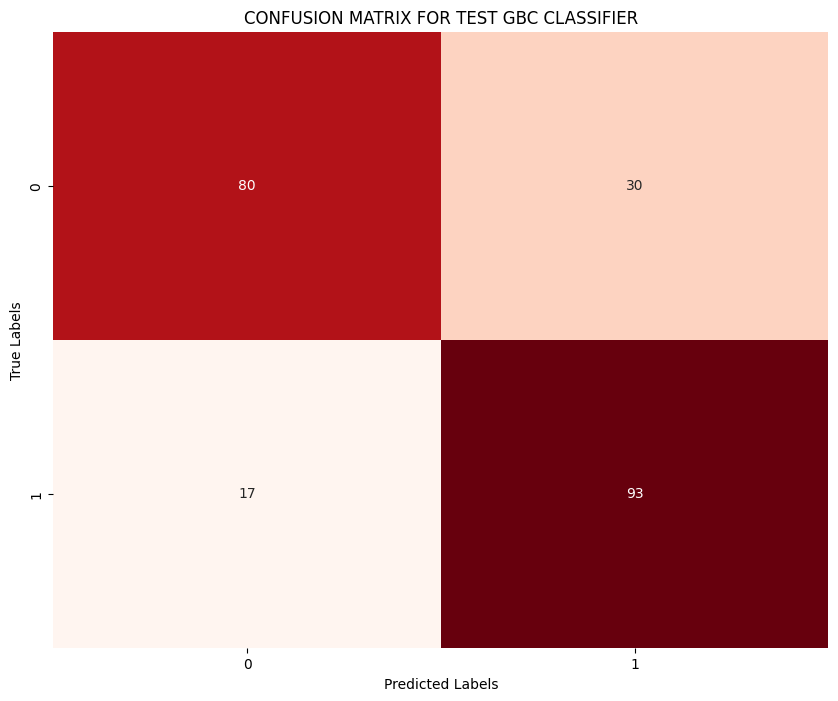

In [199]:
# Evaluate model performance on test set
accuracy_val = accuracy_score(y_test1, y_pred_test_gbc)
f1_val = f1_score(y_test1, y_pred_test_gbc)
precision_val = precision_score(y_test1, y_pred_test_gbc)
recall_val = recall_score(y_test1, y_pred_test_gbc)

print("Test Set Performance:")
print(f"Accuracy: {accuracy_val:.2f}")
print(f"F1-score: {f1_val:.2f}")
print(f"Precision: {precision_val:.2f}")
print(f"Recall: {recall_val:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test1, y_pred_test_gbc)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Reds", cbar = False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("CONFUSION MATRIX FOR TEST GBC CLASSIFIER")
plt.show()